In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('training/training.csv');
test_data = pd.read_csv('test/test.csv');
lookid_data = pd.read_csv('IdLookupTable.csv');

In [3]:
from sklearn.utils import shuffle

In [4]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [5]:
train_data.fillna(method = 'ffill',inplace = True)

In [6]:
train_data['Image'] = train_data['Image'].apply(lambda im:np.fromstring(im, sep=' '))

In [7]:
print(train_data.count())

left_eye_center_x            7049
left_eye_center_y            7049
right_eye_center_x           7049
right_eye_center_y           7049
left_eye_inner_corner_x      7049
left_eye_inner_corner_y      7049
left_eye_outer_corner_x      7049
left_eye_outer_corner_y      7049
right_eye_inner_corner_x     7049
right_eye_inner_corner_y     7049
right_eye_outer_corner_x     7049
right_eye_outer_corner_y     7049
left_eyebrow_inner_end_x     7049
left_eyebrow_inner_end_y     7049
left_eyebrow_outer_end_x     7049
left_eyebrow_outer_end_y     7049
right_eyebrow_inner_end_x    7049
right_eyebrow_inner_end_y    7049
right_eyebrow_outer_end_x    7049
right_eyebrow_outer_end_y    7049
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          7049
mouth_left_corner_y          7049
mouth_right_corner_x         7049
mouth_right_corner_y         7049
mouth_center_top_lip_x       7049
mouth_center_top_lip_y       7049
mouth_center_bottom_lip_x    7049
mouth_center_b

In [8]:
X = np.vstack(train_data['Image'].values)/255 #scale pixels values to [0,1]

In [9]:
X = X.astype(np.float32)

In [10]:
y = train_data.drop(['Image'],axis=1)

In [11]:
y = y.values

In [12]:
y = (y-48)/48;  #scale target coordinates to [-1,1]

In [13]:
X,y = shuffle(X,y,random_state=42)

In [14]:
y = y.astype(np.float32)

In [15]:
X.shape

(7049, 9216)

In [16]:
y.shape

(7049, 30)

In [17]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD
from keras.layers import Dropout

Using TensorFlow backend.
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framewo

In [18]:
model=Sequential()
model.add(Dense(128,input_dim = X.shape[1]))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(30))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1950      
Total params: 1,189,982
Trainable params: 1,189,982
Non-trainable params: 0
_________________________________________________________________


In [20]:
#sgd = SGD(lr=0.01,momentum=0.9,nesterov=True)
#model.compile(loss='mean_squared_error',optimizer=sgd)
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])

In [21]:
hist = model.fit(X,y,epochs=50,batch_size=128,validation_split=0.2,verbose=False)

In [22]:
hist

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def plot_loss(hist,name,plt,RMSE_TF = False):
    loss = hist['loss']
    val_loss = hist['val_loss']
    
    if RMSE_TF:
        loss = np.sqrt(np.array(loss))*48
        val_loss = np.sqrt(np.array(val_loss))*48
        
    plt.plot(loss,"--",linewidth=3,label="train:"+name)
    plt.plot(val_loss,linewidth=3,label="val"+name)

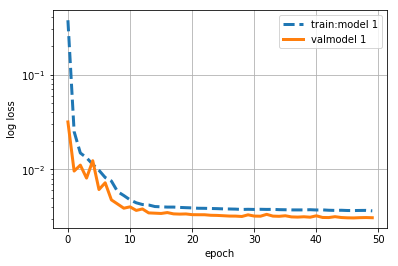

In [25]:
plot_loss(hist.history,"model 1",plt)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("log loss")
plt.show()

In [26]:
test_data = pd.read_csv('test/test.csv');

In [27]:
test_data.head().T

,0,1,2,3,4
ImageId,1,2,3,4,5
Image,182 183 182 182 180 180 176 169 156 137 124 10...,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...,177 176 174 170 169 169 168 166 166 166 161 14...,176 174 174 175 174 174 176 176 175 171 165 15...,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [28]:
test_data.fillna(method = 'ffill',inplace = True)

In [29]:
test_data['Image'] = test_data['Image'].apply(lambda im:np.fromstring(im, sep=' '))

In [30]:
print(test_data.count())

ImageId    1783
Image      1783
dtype: int64


In [31]:
X_test = np.vstack(test_data['Image'].values)/255 #scale pixels values to [0,1]

In [32]:
X_test = X_test.astype(np.float32)

In [33]:
y_test = model.predict(X_test)

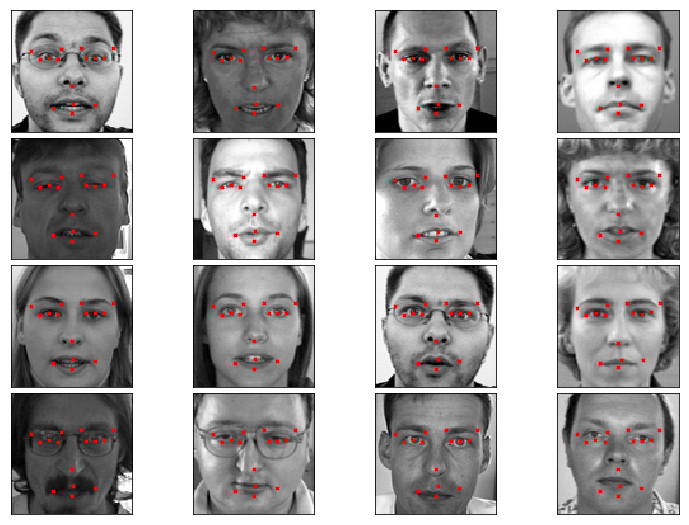

In [34]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10,color = "red")


fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_test[i], axis)

plt.show()

In [43]:
y_test = y_test*48+48

In [44]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(y_test)
rowid = list(lookid_data['RowId'])

In [45]:
feature =[]
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

In [46]:
preded =[]
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [47]:
rowid = pd.Series(rowid,name='RowId')
loc = pd.Series(preded,name='Location')

In [48]:
submission = pd.concat([rowid,loc],axis = 1)

In [49]:
submission.to_csv('DNN_submission.csv',index = False)